<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/B_spline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def B(x, k, i, t):
   if k == 0:
      return 1.0 if t[i] <= x < t[i+1] else 0.0
   if t[i+k] == t[i]:
      c1 = 0.0
   else:
      c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
   if t[i+k+1] == t[i+1]:
      c2 = 0.0
   else:
      c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
   return c1 + c2

In [6]:
def bspline(x, t, c, k):
   n = len(t) - k - 1
   assert (n >= k+1) and (len(c) >= n)
   return sum(c[i] * B(x, k, i, t) for i in range(n))

In [7]:
from scipy.interpolate import BSpline
from numpy import array
k = 2
t = [0, 1, 2, 3, 4, 5, 6]
c = [-1, 2, 0, -1]
spl = BSpline(t, c, k)
spl(2.5)
array(1.375)
bspline(2.5, t, c, k)


1.375

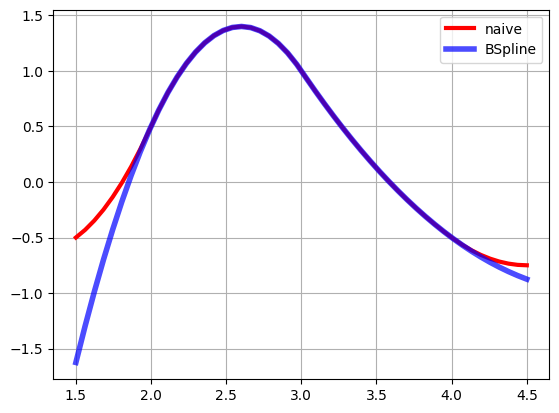

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xx = np.linspace(1.5, 4.5, 50)
ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3, label='naive')
ax.plot(xx, spl(xx), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.grid(True)
ax.legend(loc='best')
plt.show()